# Author: Alejandro C Parra García

In [1]:
import numpy as np
import pandas as pd
from tensorflow import random
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam 
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(1)
random.set_seed(1)

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.shape

(322, 20)

In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
#Drop the Nulls
df=df.dropna(axis=0,subset=['Salary'])
df=df.reset_index(drop=True)

In [6]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

[[<AxesSubplot:title={'center':'AtBat'}>
  <AxesSubplot:title={'center':'Hits'}>
  <AxesSubplot:title={'center':'HmRun'}>
  <AxesSubplot:title={'center':'Runs'}>]
 [<AxesSubplot:title={'center':'RBI'}>
  <AxesSubplot:title={'center':'Walks'}>
  <AxesSubplot:title={'center':'Years'}>
  <AxesSubplot:title={'center':'CAtBat'}>]
 [<AxesSubplot:title={'center':'CHits'}>
  <AxesSubplot:title={'center':'CHmRun'}>
  <AxesSubplot:title={'center':'CRuns'}>
  <AxesSubplot:title={'center':'CRBI'}>]
 [<AxesSubplot:title={'center':'CWalks'}>
  <AxesSubplot:title={'center':'PutOuts'}>
  <AxesSubplot:title={'center':'Assists'}>
  <AxesSubplot:title={'center':'Errors'}>]
 [<AxesSubplot:title={'center':'Salary'}> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]


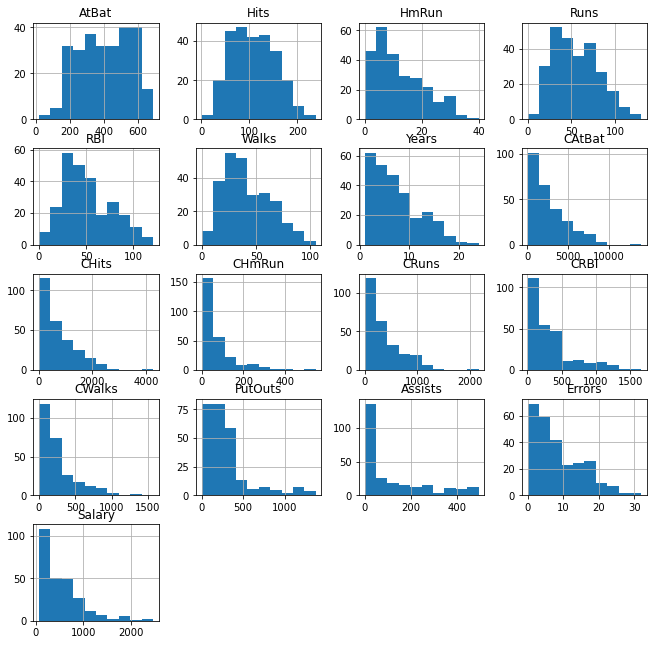

In [7]:
print(df.hist(figsize=[11,11]))

In [8]:
from sklearn.preprocessing import MinMaxScaler
# now, we normalize the data. Using the Min max Scaler, from sklearn

minmax=MinMaxScaler()
a_minmax=minmax.fit_transform(df[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat',
                                  'CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors']])
df_minmax = pd.DataFrame(a_minmax)
df['AtBat']=df_minmax[0]
df['Hits']=df_minmax[1]
df['HmRun']=df_minmax[2]
df['Runs']=df_minmax[3]
df['RBI']=df_minmax[4]
df['Walks']=df_minmax[5]
df['Years']=df_minmax[6]
df['CAtBat']=df_minmax[7]
df['CHits']=df_minmax[8]
df['CHmRun']=df_minmax[9]
df['CRuns']=df_minmax[10]
df['CRBI']=df_minmax[11]
df['CWalks']=df_minmax[12]
df['PutOuts']=df_minmax[13]
df['Assists']=df_minmax[14]
df['Errors']=df_minmax[15]

In [9]:
# Do One hot Encoding
df=pd.get_dummies(df)
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,0.443114,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.458969,0.087398,0.31250,475.0,0,1,0,1,0,1
1,0.688623,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.639070,0.166667,0.43750,480.0,1,0,0,1,1,0
2,0.714072,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.145243,0.022358,0.09375,500.0,0,1,1,0,0,1
3,0.452096,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.584604,0.081301,0.12500,91.5,0,1,1,0,0,1
4,0.860778,0.708861,0.100,0.569231,0.421488,0.333333,0.434783,0.312740,0.265522,0.034672,...,0.204793,0.855691,0.78125,750.0,1,0,0,1,1,0


In [10]:
df.shape[1]

23

# Split DATA into Train and Test

In [11]:
from sklearn.model_selection import train_test_split
# Split Train(70%) and Test(30%) 
x=df.drop(columns=['Salary'])
y=df.Salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
print(x_train.shape)
print(y_train.shape)

(184, 22)
(184,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(79, 22)
(79,)


In [14]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,0.443114,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.238978,0.458969,0.087398,0.31250,0,1,0,1,0,1
1,0.688623,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.167412,0.639070,0.166667,0.43750,1,0,0,1,1,0
2,0.714072,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.225559,0.145243,0.022358,0.09375,0,1,1,0,0,1
3,0.452096,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.020447,0.584604,0.081301,0.12500,0,1,1,0,0,1
4,0.860778,0.708861,0.100,0.569231,0.421488,0.333333,0.434783,0.312740,0.265522,0.034672,...,0.123323,0.204793,0.855691,0.78125,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.715569,0.531646,0.175,0.500000,0.396694,0.352381,0.173913,0.191250,0.188617,0.058394,...,0.087540,0.236020,0.018293,0.09375,0,1,1,0,0,1
259,0.708084,0.569620,0.125,0.584615,0.413223,0.895238,0.478261,0.391335,0.354421,0.071168,...,0.558466,0.227306,0.774390,0.62500,1,0,1,0,1,0
260,0.682635,0.527426,0.075,0.469231,0.355372,0.495238,0.217391,0.119781,0.100894,0.012774,...,0.092652,0.026870,0.229675,0.21875,1,0,0,1,1,0
261,0.829341,0.603376,0.225,0.653846,0.495868,0.742857,0.304348,0.226521,0.200611,0.177007,...,0.211502,0.954248,0.266260,0.37500,1,0,1,0,1,0


# Build Model

In [15]:
model = Sequential()

model.add(Dense(units = 10, activation='relu', input_dim= (x_train.shape[1]) ))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 4, activation='relu'))
model.add(Dense(units = 1, activation='relu'))

model.compile(optimizer=Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

Use the Relu activation function since is faster to train than the tanh for the hidden layers, according to the book. 
For the output layer also use the Relu activation function since we are trying to predict a salary, so the Relu return a value from 0 to ∞. And thus, is better for this case. Since the Sigmoid return 0 to 1 and the tanh return -1 to 1, and thus unsuitable for a salary.

The idea of the architecture is to compress the information to try to predict a Salary. Thus, the number of nodes in each layer get reduced the deeper the neural network gets. 
10-10-8-8-6-4-1

The loss function is set to MSE or Mean Squared Error, since we are trying to predict a number. And this loss function penalizes higher errors more instantly than smaller deviations.

According to the book page 105, Adam outperforms SGD. So, I’m going to use Adam



# Fit model

In [16]:
history = model.fit(x_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
6/6 [==============================] - 0s 1ms/step - loss: 494356.4375 - mae: 539.0511
Epoch 2/1000
6/6 [==============================] - 0s 997us/step - loss: 426608.7812 - mae: 475.1790
Epoch 3/1000
6/6 [==============================] - 0s 1ms/step - loss: 215351.1094 - mae: 367.1131
Epoch 4/1000
6/6 [==============================] - 0s 1ms/step - loss: 224837.9531 - mae: 321.5430
Epoch 5/1000
6/6 [==============================] - 0s 997us/step - loss: 201242.6562 - mae: 292.5045
Epoch 6/1000
6/6 [==============================] - 0s 836us/step - loss: 151369.0781 - mae: 309.0674
Epoch 7/1000
6/6 [==============================] - 0s 1ms/step - loss: 134887.0469 - mae: 263.0858
Epoch 8/1000
6/6 [==============================] - 0s 837us/step - loss: 133548.0469 - mae: 262.1598
Epoch 9/1000
6/6 [==============================] - 0s 1ms/step - loss: 125461.8516 - mae: 262.8344
Epoch 10/1000
6/6 [==============================] - 0s 1ms/step - loss: 123069.5000 - mae: 

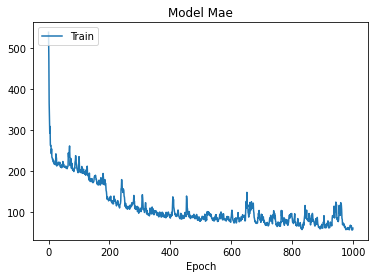

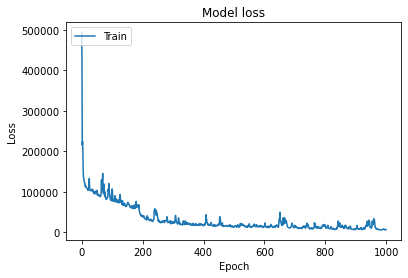

In [17]:
# Code adapted from the book, page 109
# Plot training MAE values
plt.plot(history.history['mae'])
plt.title('Model Mae')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Predict

In [18]:
y_predicted = model.predict(x_test)

In [19]:
d = {'real': y_test.values}
df_f=pd.DataFrame(data=d)
df_f["predicted"]=y_predicted

In [20]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))
print("MAE:",metrics.mean_absolute_error(y_test,y_predicted))
print("R2:",metrics.r2_score(y_test, y_predicted))

RMSE: 337.3553404603134
MAE: 210.81358704849438
R2: 0.4299254250662289


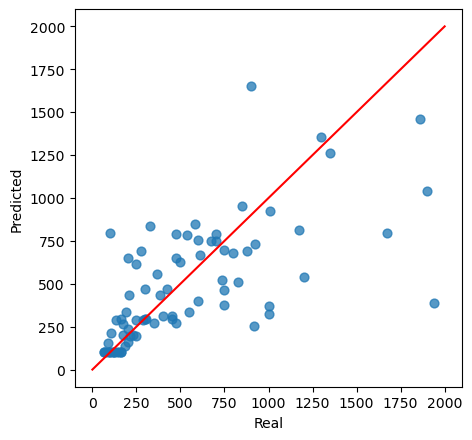

In [21]:
xx=[0,2000]
yy=[0,2000]
plt.figure(figsize=(5,5), dpi=100)

plt.scatter(df_f["real"], df_f["predicted"],s=40, alpha=0.75)
plt.plot(xx, yy, '-r', label='')

plt.ylabel('Predicted')
plt.xlabel('Real')
plt.show()

We can see from the Graph that the results of the model are really bad. They get worse with the higher salaries, but that can be explain because there aren’t many datapoints in the higher salaries.
We can also see it with the metrics. The RMSE is 337.35, the MAE is 210.81 and the R2 is 0.42. Overall, a bad model.
